<a href="https://colab.research.google.com/github/ncarpino/Lecture-1-441B/blob/main/MLLABAssignmnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nic Carpino ML (425) Lab #2 

# 1.) Import the data from CCLE into a new Google Colab file

In [287]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [288]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [289]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ 441B/insurance.csv")

In [282]:
#df.loc[df['sex'] == 'female','sex']= 1
#df.loc[df['sex'] == 'male','sex']= 0

In [283]:
#df.loc[df["smoker"] == "yes","smoker"] = 1.
#df.loc[df["smoker"] == "no","smoker"] = 0.

In [284]:
#df.loc[df["region"] == "yes","region"] = 1.
#df.loc[df["region"] == "no","region"] = 0.
#df.loc[df["region"] == "yes","region"] = 1.
#df.loc[df["region"] == "no","region"] = 0.

In [292]:
pd.get_dummies(df)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [294]:
df = pd.get_dummies(df)

In [295]:
df = df.drop(columns = ['sex_male', 'smoker_no'])

In [296]:
df.head()

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [297]:
df['charges_new'] = df.loc[:,'charges']

In [299]:
df = df.drop(columns = ['charges'])

In [300]:
df.head() 

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges_new
0,19,27.900,0,1,1,0,0,0,1,16884.92400
1,18,33.770,1,0,0,0,0,1,0,1725.55230
2,28,33.000,3,0,0,0,0,1,0,4449.46200
3,33,22.705,0,0,0,0,1,0,0,21984.47061
4,32,28.880,0,0,0,0,1,0,0,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [301]:
import numpy as np

In [302]:
data = np.array(df.iloc[:, :-1]) 
target = np.array(df.iloc[:, -1])

In [303]:
cut = int((len(data) * .8) // 1)

In [304]:
in_data = data[:cut]
out_data = data[cut:]


in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [305]:
from sklearn import preprocessing

In [306]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

In [307]:
in_data_scale

array([[-1.45390122, -0.47403991, -0.90286618, ..., -0.55791981,
        -0.6155209 ,  1.76504522],
       [-1.52464584,  0.4911621 , -0.06353793, ..., -0.55791981,
         1.6246402 , -0.56655772],
       [-0.81719959,  0.36455128,  1.61511857, ..., -0.55791981,
         1.6246402 , -0.56655772],
       ...,
       [-0.03900872,  1.95211949, -0.90286618, ..., -0.55791981,
        -0.6155209 , -0.56655772],
       [ 1.65886228, -1.50008089, -0.06353793, ...,  1.79237229,
        -0.6155209 , -0.56655772],
       [ 1.02216066,  0.18367867, -0.06353793, ..., -0.55791981,
         1.6246402 , -0.56655772]])

# 4.) Get lambda from Lasso cross validation

In [308]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

modCV = LassoCV().fit(in_data_scale, in_target)

In [309]:
modCV.alpha_


176.27926602952408

In [310]:
a = modCV.alpha_

In [311]:
mod1 = Lasso().fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))


array([24938.26789057,  3332.15889172,  6542.28589418, ...,
       12468.33833753, 11545.06183012, 12289.53262974])

In [313]:
mod1.coef_


array([3667.23122144, 2061.37516561,  522.29294025,  125.71548854,
       9476.73425876,  462.43370504,  256.8021009 ,  -17.57973961,
        -71.4819509 ])

# 5.) Run a Lasso regression with that Lambda

In [314]:
from sklearn.linear_model import Lasso

In [315]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)
mod1.predict(np.array(in_data_scale))

array([25183.60339362,  3987.46168753,  6851.47030787, ...,
       12026.59098337, 11582.27730504, 12411.04788406])

In [316]:
mod1.coef_

array([3528.00434416, 1826.30391965,  357.05042958,    0.        ,
       9280.6053717 ,  184.6116486 ,    0.        ,   -0.        ,
        -65.20708602])

# 6.) Visualize the coefficients 

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [262]:
#viz = mod1.coef_

In [322]:
#sns.histplot(data=viz)
plt.show()

In [320]:
column_names = list(df.columns.values)
column_names = column_names[:-1]
column_names

['age',
 'bmi',
 'children',
 'sex_female',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

<function matplotlib.pyplot.show(*args, **kw)>

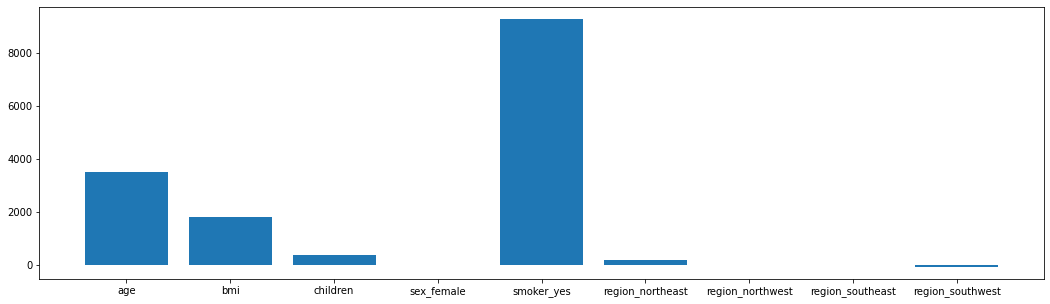

In [323]:
figure(figsize = (18,5))
plt.bar(column_names,mod1.coef_)
plt.show

# 7.) Interpret the coefficients

In [ ]:
The visualization shows the strong magnitude of Age, BMI, and Smoking.
While these are not in order, we do not need to re-normalize in Lasso.

In [ ]:
Another interpretation we can make is that Children and the "Northeast" Region both have similar magnitudes (and effects). 
In constrast, all other Regions, along with  gender, have little to no magnitude
The lasso regression esentially removed these.



---



# 8.) Compare in and out of sample MSE’s

In [345]:
#mod1.predict("in sample data")
#mod1.predict("out of sample data")

In [346]:
train_pred = mod1.predict(in_data_scale)

In [331]:
test_pred = mod1.predict(out_data_scale)

In [343]:
!pip install scikit-learn
!pip install sklearn
import sklearn
#print(sklearn.__version__)
from sklearn import metrics
from sklearn import linear_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.0.2


In [344]:
np.sqrt(sklearn.metrics.mean_squared_error(in_target, train_pred))

6050.050430015304

In [347]:
np.sqrt(sklearn.metrics.mean_squared_error(out_target, test_pred))

6107.787546899505